# Cell 1: Imports and Logging

In [1]:
# Cell 1: Imports and Logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

# Logging setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info("Libraries imported and logging configured.")


2025-04-16 14:28:00,827 - INFO - Libraries imported and logging configured.


# Cell 2: Load Data

In [2]:
# Cell 2: Load Data
data_path = os.path.join("..", "data", "raw", "metadata_indofloods.csv")
df = pd.read_csv(data_path)
logging.info(f"Data loaded from {data_path}. Shape: {df.shape}")

# Quick look
display(df.head())
display(df.info())


2025-04-16 14:28:03,669 - INFO - Data loaded from ..\data\raw\metadata_indofloods.csv. Shape: (214, 18)


,GaugeID,Warning Level,Danger Level,Station,Latitude,Longitude,River Name/ Tributory/ SubTributory,Basin,State,Start_date,End_date,Level_Entries,Streamflow_Entries,Privacy,Source Catchment Area,Catchment Area,Area variation (%),Reliability
0,INDOFLOODS-gauge-394,259.20,262.00,Biligundulu,12.1800,77.7300,Cauvery,Cauvery,Karnataka,8/30/1971,5/27/2020,17715,17273,Open,36682.0,36889.800780,0.566493,Safe
1,INDOFLOODS-gauge-118,66.75,67.75,Jainagar,26.5833,86.1481,Ganga/Kosi/ Kamla-Balan,Ganga - Brahmaputra - Meghna/Barak,Bihar,7/1/1970,12/31/2010,14134,13725,Restricted,2131.0,2118.569336,0.583325,Safe
2,INDOFLOODS-gauge-119,49.00,50.00,Jhanjharpur,26.2333,86.2594,Ganga/Kosi/ Kamla-Balan,Ganga - Brahmaputra - Meghna/Barak,Bihar,1/1/1970,12/31/2010,14939,14616,Restricted,2945.0,3504.423584,18.995707,Safe
3,INDOFLOODS-gauge-121,70.00,71.00,DHENG BRIDGE,26.7228,85.3231,Ganga/Kosi/ Bagmati,Ganga - Brahmaputra - Meghna/Barak,Bihar,7/1/1970,12/31/2010,14762,14750,Restricted,3790.0,3580.846924,5.518551,Safe
4,INDOFLOODS-gauge-560,218.00,220.98,Burhanpur,21.2994,76.2350,Tapi,Tapi,Madhya Pradesh,9/14/1972,8/20/2019,16611,16249,Open,8487.0,8926.981445,5.184181,Safe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GaugeID                              214 non-null    object 
 1   Warning Level                        214 non-null    float64
 2   Danger Level                         212 non-null    float64
 3   Station                              214 non-null    object 
 4   Latitude                             214 non-null    float64
 5   Longitude                            214 non-null    float64
 6   River Name/ Tributory/ SubTributory  214 non-null    object 
 7   Basin                                212 non-null    object 
 8   State                                214 non-null    object 
 9   Start_date                           214 non-null    object 
 10  End_date                             214 non-null    object 
 11  Level_Entries                   

None

# Cell 3: Data Validation

In [3]:
# Cell 3: Data Validation
assert df['Latitude'].between(-90, 90).all(), "Invalid latitude values detected!"
assert df['Longitude'].between(-180, 180).all(), "Invalid longitude values detected!"
missing = df.isnull().sum()
logging.info(f"Missing values per column:\n{missing}")

# Handle missing values (example: fill with median or drop)
df_clean = df.copy()
for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean = df_clean.dropna(axis=0)  # Drop rows with remaining missing values

logging.info(f"Data cleaned. New shape: {df_clean.shape}")
display(df_clean.head())


2025-04-16 14:28:08,649 - INFO - Missing values per column:
GaugeID                                 0
Warning Level                           0
Danger Level                            2
Station                                 0
Latitude                                0
Longitude                               0
River Name/ Tributory/ SubTributory     0
Basin                                   2
State                                   0
Start_date                              0
End_date                                0
Level_Entries                           0
Streamflow_Entries                      0
Privacy                                 0
Source Catchment Area                  16
Catchment Area                          0
Area variation (%)                     16
Reliability                             0
dtype: int64
2025-04-16 14:28:08,658 - INFO - Data cleaned. New shape: (212, 18)


,GaugeID,Warning Level,Danger Level,Station,Latitude,Longitude,River Name/ Tributory/ SubTributory,Basin,State,Start_date,End_date,Level_Entries,Streamflow_Entries,Privacy,Source Catchment Area,Catchment Area,Area variation (%),Reliability
0,INDOFLOODS-gauge-394,259.20,262.00,Biligundulu,12.1800,77.7300,Cauvery,Cauvery,Karnataka,8/30/1971,5/27/2020,17715,17273,Open,36682.0,36889.800780,0.566493,Safe
1,INDOFLOODS-gauge-118,66.75,67.75,Jainagar,26.5833,86.1481,Ganga/Kosi/ Kamla-Balan,Ganga - Brahmaputra - Meghna/Barak,Bihar,7/1/1970,12/31/2010,14134,13725,Restricted,2131.0,2118.569336,0.583325,Safe
2,INDOFLOODS-gauge-119,49.00,50.00,Jhanjharpur,26.2333,86.2594,Ganga/Kosi/ Kamla-Balan,Ganga - Brahmaputra - Meghna/Barak,Bihar,1/1/1970,12/31/2010,14939,14616,Restricted,2945.0,3504.423584,18.995707,Safe
3,INDOFLOODS-gauge-121,70.00,71.00,DHENG BRIDGE,26.7228,85.3231,Ganga/Kosi/ Bagmati,Ganga - Brahmaputra - Meghna/Barak,Bihar,7/1/1970,12/31/2010,14762,14750,Restricted,3790.0,3580.846924,5.518551,Safe
4,INDOFLOODS-gauge-560,218.00,220.98,Burhanpur,21.2994,76.2350,Tapi,Tapi,Madhya Pradesh,9/14/1972,8/20/2019,16611,16249,Open,8487.0,8926.981445,5.184181,Safe


# Cell 4: Outlier Detection (Z-score)

In [4]:
# Cell 4: Outlier Detection (Z-score)
from scipy.stats import zscore

numeric_cols = df_clean.select_dtypes(include=np.number).columns
z_scores = np.abs(zscore(df_clean[numeric_cols]))
outlier_rows = (z_scores > 3).any(axis=1)
num_outliers = outlier_rows.sum()
logging.info(f"Number of outlier rows (Z-score > 3): {num_outliers}")

# Optionally drop outliers
df_no_outliers = df_clean[~outlier_rows].reset_index(drop=True)
logging.info(f"Shape after outlier removal: {df_no_outliers.shape}")


2025-04-16 14:28:12,769 - INFO - Number of outlier rows (Z-score > 3): 12
2025-04-16 14:28:12,774 - INFO - Shape after outlier removal: (200, 18)


# Cell 5: Descriptive Stats and Correlation

,Warning Level,Danger Level,Latitude,Longitude,Level_Entries,Streamflow_Entries,Source Catchment Area,Catchment Area,Area variation (%)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,201.059825,200.967100,19.428481,78.744421,9106.280000,9083.915000,18567.154400,18548.175904,7.317529
std,201.037543,201.219122,6.333323,4.485682,6602.600571,6995.594861,28156.985824,27708.664602,15.387700
min,2.500000,3.500000,8.160000,72.791700,57.000000,0.000000,75.000000,24.711016,0.010118
25%,24.497500,25.497500,13.464600,75.785300,1157.500000,0.000000,1916.250000,1426.504608,0.943208
50%,124.235000,123.750000,20.051250,77.189050,10507.000000,11193.000000,7396.500000,6768.059815,2.605542
75%,335.758250,336.758250,25.383800,80.064025,14776.500000,14751.500000,21431.000000,24358.770020,5.485275
max,891.450000,893.000000,30.425300,91.591900,19776.000000,19626.000000,138123.000000,132700.406300,96.405711


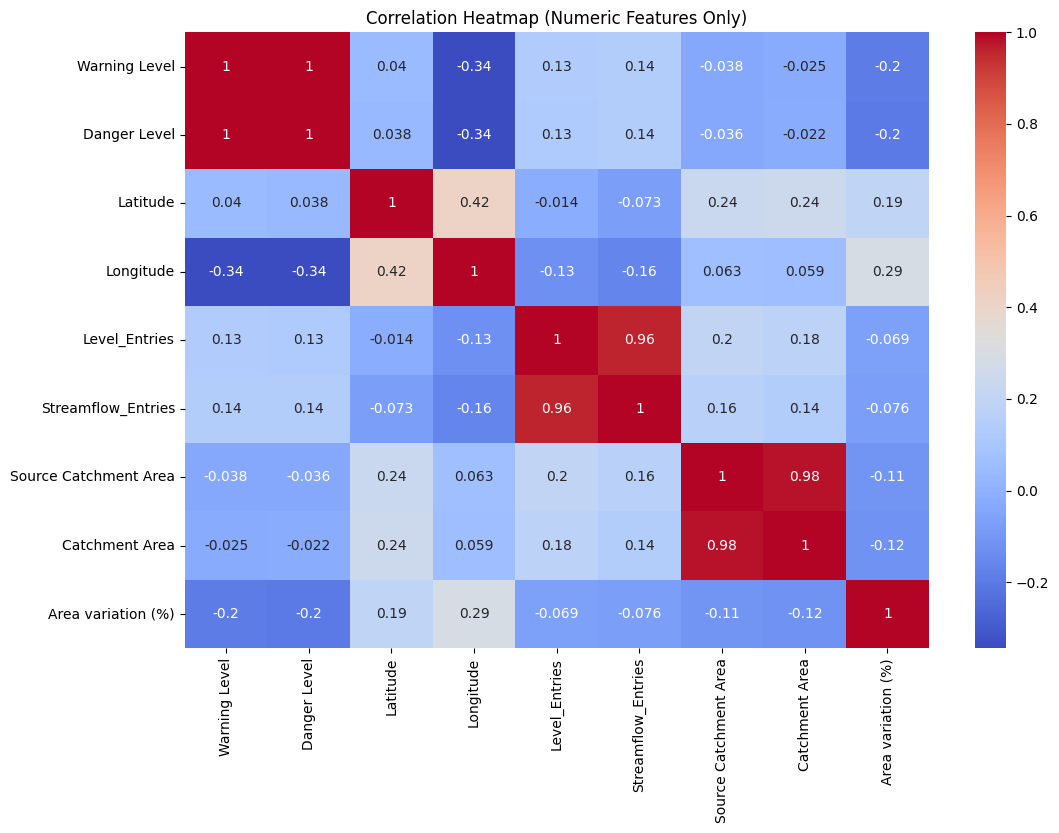

In [6]:
# Only select numeric columns for correlation
numeric_df = df_no_outliers.select_dtypes(include=[np.number])

# Show descriptive statistics for numeric columns
display(numeric_df.describe())

# Plot correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# Cell 6: Feature Distributions

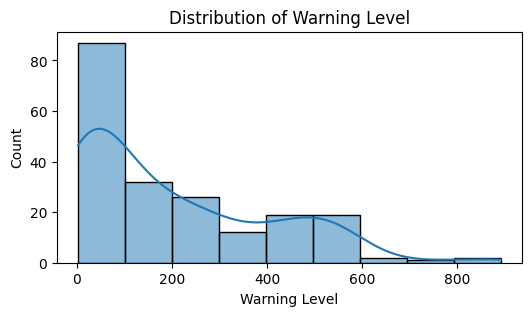

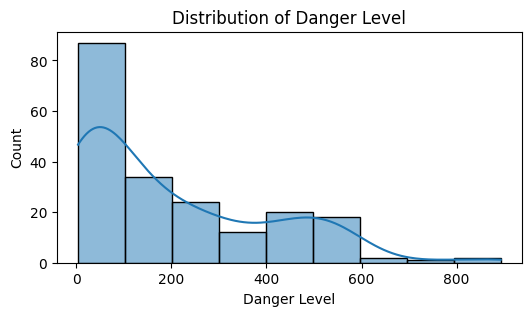

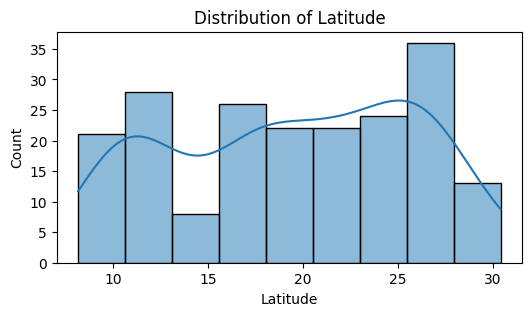

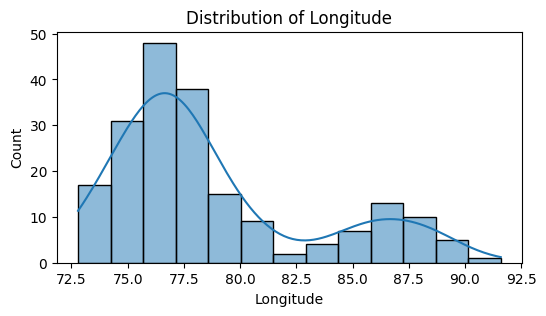

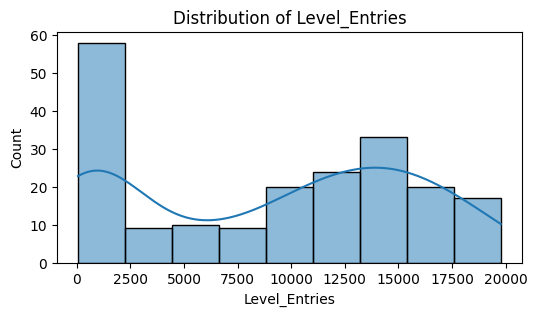

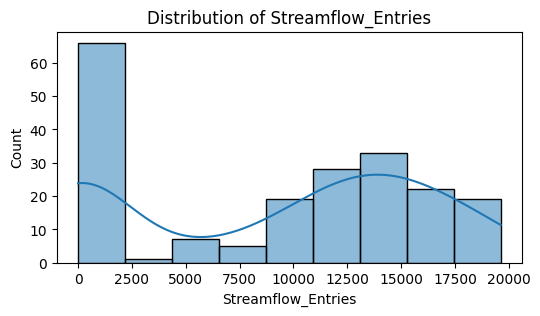

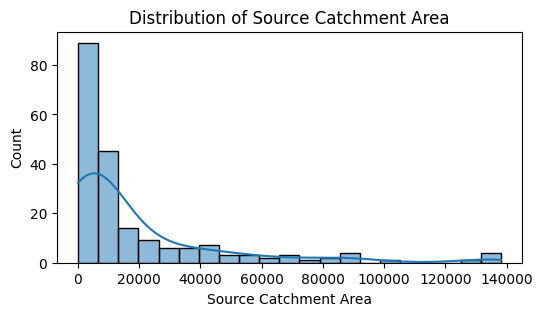

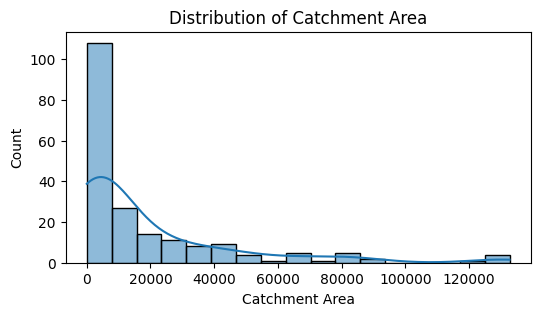

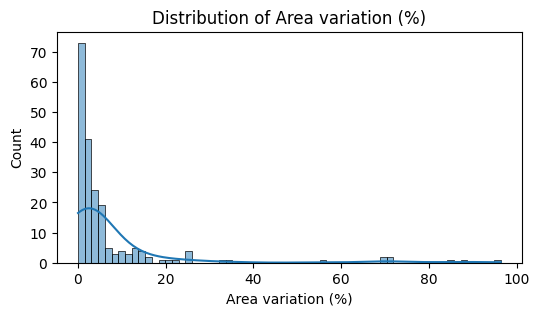

In [7]:
# Cell 6: Feature Distributions
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_no_outliers[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


# Cell 7: Geospatial Plot

In [10]:
# Cell 7: Enhanced Geospatial Plot with Risk Levels and Popups

# If folium or numpy are not installed, uncomment and run:
# !pip install folium branca numpy

import folium
from folium.plugins import MarkerCluster
import numpy as np

# Helper function to define risk level
def get_risk_level(row):
    # Use Danger Level if available, else Warning Level
    risk = row['Danger Level'] if not np.isnan(row['Danger Level']) else row['Warning Level']
    # Define risk categories (customize thresholds as needed)
    if risk >= 10:
        return 'High'
    elif risk >= 5:
        return 'Medium'
    else:
        return 'Low'

# Prepare DataFrame for plotting
plot_df = df_no_outliers.copy()
plot_df['Risk Level'] = plot_df.apply(get_risk_level, axis=1)

# Color mapping for risk levels
risk_colors = {'High': 'red', 'Medium': 'orange', 'Low': 'green'}

# Create folium map centered on mean coordinates
m = folium.Map(location=[plot_df['Latitude'].mean(), plot_df['Longitude'].mean()], zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)

# Add points with detailed popups and colored by risk
for _, row in plot_df.iterrows():
    risk = row['Risk Level']
    color = risk_colors.get(risk, 'blue')
    popup_html = f"""
    <b>Station:</b> {row['Station']}<br>
    <b>GaugeID:</b> {row['GaugeID']}<br>
    <b>State:</b> {row['State']}<br>
    <b>Basin:</b> {row['Basin'] if pd.notnull(row['Basin']) else 'N/A'}<br>
    <b>Warning Level:</b> {row['Warning Level']}<br>
    <b>Danger Level:</b> {row['Danger Level']}<br>
    <b>Catchment Area:</b> {row['Catchment Area']}<br>
    <b>Area variation (%):</b> {row['Area variation (%)']}<br>
    <b>Reliability:</b> {row['Reliability']}<br>
    <b>Risk Level:</b> <span style='color:{color};font-weight:bold'>{risk}</span>
    """
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(popup_html, max_width=350),
        tooltip=f"{row['Station']} ({risk} Risk)"
    ).add_to(marker_cluster)

# Save the interactive map
output_path = "../data/outputs/eda_map_risk.html"
m.save(output_path)
logging.info(f"Enhanced geospatial map with risk levels saved to {output_path}")
print(f"Map saved: {output_path}")


2025-04-16 14:37:05,400 - INFO - Enhanced geospatial map with risk levels saved to ../data/outputs/eda_map_risk.html


Map saved: ../data/outputs/eda_map_risk.html
